# APS 8

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ eo desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

Respostas item 1

a) O novo preço médio é de R$60 e o desvio padrão permanece o mesmo


b) O novo preço médio é 112,5 reais e o novo desvio padrão é 62,5 reais


c) O gasto total esperado é de 450 reais e o desvio padrao é de 250 reais


In [42]:
    #b)

# Novo preço médio:
#P(c*x) = c*P(x)
P = 45
NP = 2.5*45
NP

# Novo desvio padrão
# DP(c*x) = c*(DP(x))
DP = 25
NDP = 2.5*DP
NDP


62.5

In [43]:
    #c)

# E(10*x) = 10*E(x), DP(10*x) = 10*DP(x)

## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.



Respostas item 2

a) A média final é 5,5. O desvio padrão é 2,3

b) A probabilidade se ser aprovado é de 58.604829635176856%

In [44]:
    #)a
    
Mf = (4+7)/2
Mf

#Var(x+y) = Var(x) + Var(y) + 2*Cov(x,y)

Var = 2.25 + 1 + 2*0.675
DP = (Var)**1/2
DP

prob = (1-stats.norm.cdf(5, loc=Mf, scale=DP))*100
prob

58.604829635176856

### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

In [46]:
houses = pd.read_csv("casas.csv")

In [47]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


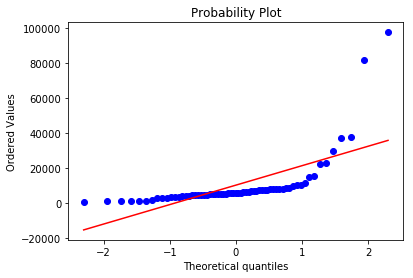

In [48]:
    #a) teste de normalidade

graf = stats.probplot(houses.sqft_lot, dist='norm', plot=plt)

plt.show()

Média:  2094.2153846153847
Desvio padrão amostral:  853.1023072496145
Limite inferior: 1583.7875
Limite superior: 2651.0325


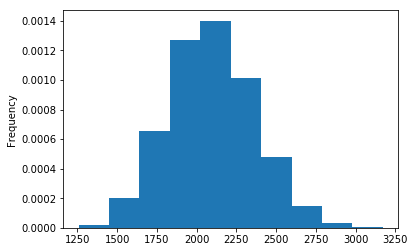

In [49]:
dados = pd.Series(houses.sqft_living)
n = len(dados)

#Estimativas
xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)

#Reamostragens da amostra mestre (dados) com reposição
n = 10
xbarra_Boot = []

B = 10000
for i in range(B):
    # Reamostra dos dados _com_ reposição
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.mean(amostra)
    xbarra_Boot.append(xbarraB)
    
    
#Intervalo de confiança Bootstrap Percentil, confiança = 0.95

Lim_inf = np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)

#Distribuição Bootstrap 
pd.Series(xbarra_Boot).plot.hist(normed=True, legend=False);




Respostas item 3

b) Se fosse normal, poderia ter sido feito o teste t

c) Não saberíamos nem μ nem  σ, e sim um grau de liberdade

d), e) gráfico

f) A distribuição Bootstrap está centrada próxima à média da amostra mestre, indicando que o intervalo de confiança está certo

## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

In [51]:
Y = houses['price']
X = houses['sqft_living']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        15:50:52   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510   -9.95e+04    1.98e+05
sqft_living   247.0810     32.954      7.498      0.000     181.227     312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico




Respostas item 4)

a) São, respectivamente, os coeficientes linear e angular da reta estimada

b) O R-squared é o coeficiente de determinação, que varia de 0 a 1, e quanto mais maior ele é, mais o modelo é explicativo em relaçao aos valores observados, uma espécie de medida da qualidade do ajuste do modelo. P>|t| indica a probabildade da hipotese nula não ser rejeitada. É a significancia, relacionada a precisão da estimativa. Prob (F-statistic) testa a significancia geral do modelo, testa as hipoteses nulas que todos do coeficientes de reggressão sao 0, e nesse caso dá um valor extremamente pequeno. Olhando esses 3 valores obtidos acima, chega-se a conclusão que a hipotese nula não deve ser rejeitada.

c) price = 4.928e+04 + 247.0810

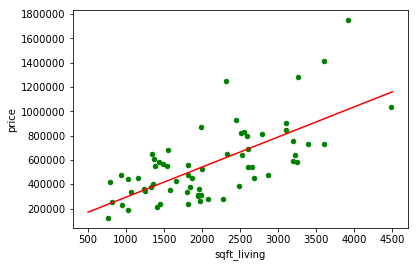

In [52]:
houses.plot.scatter('sqft_living','price',c='g')
plt.plot((500,4500),(170000,1161144),c='r')

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)

In [53]:
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9115
Date:                Tue, 28 Nov 2017   Prob (F-statistic):              0.407
Time:                        16:28:25   Log-Likelihood:                -912.03
No. Observations:                  65   AIC:                             1830.
Df Residuals:                      62   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+05   5.01e+04     10.462      0.000    4.24e+05    6.24e+05
sqft_lot          2.7668      2.383      1.161      0.250      -1.997       7.531
sqft_basement    68.6891    101.802      0.675      0.502    -134.810     272.188
==============================================================================
Omnibus:                       24.116   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.221
Skew:                           1.369   Prob(JB):                     5.02e-09
Kurtosis:                       5.572   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



a) P>|t| de sqft_lot indica a rejeição da hipotese nula (0.25), enquanto P>|t| de sqft_baasement indica a não rejeição por pouco (0.502). O coeficiente de determinação R-squared é um valor baixo, mostrando que o modelo não está muito ajustado. Por fim, ao analisar o ] valor Prob (F-statistic), este indica uma probabildade de 40,7% dos coeficientes de regressão serem nulos, assim há maior chance dos coeficientes da regressão em questão não serem nulos


b) price = 5.237e+05 + 2.7668 sqft_lot + 68.6891 sqft_basement
